### **A case study on how Bellabeat could influence the marketing strategy for their Leaf Tracker using FitBit fitness tracker data.**

This data analysis project will follow the Google Data Analysis Process. It will be a reproducible data analysis because the data analysis team is part of the stakeholders for the project.

### ASK PHASE
In this phase, I engaged with key stakeholders to discern the necessity for analyzing smart device fitness data to facilitate the identification of the core business task. 
The determined business task, as articulated by key stakeholders for this project, is to uncover trends in smart device usage that can potentially impact BellaBeat's marketing strategy for the Leaf Tracker.

### PREPARE PHASE
In this phase, I downloaded and examined the datasets relevant to this analysis. Specifically, I utilized the FitBit Fitness Tracker Data (CC0: Public Domain, available through Mobius) from Kaggle. This dataset encompasses personal fitness tracker data from 33 FitBit users, provided in .csv files. I initially reviewed the datasets using spreadsheet software, ensuring their integrity. Based on my review and verification process, I am optimistic that the data holds potential for extracting valuable insights.

### PROCESS PHASE
This data analysis project will use R programming language because it has tools that help create various charts, customize their appearance, allows for further analysis with large datasets, and performs data manipulation and visualization quickly. 

#### Import and install the required packages and libraries.

In [1]:
# install.packages("tidyverse")
# install.packages("ggplot2")

In [2]:
library(tidyverse)
library(readr)
library(tidyr)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Loading and viewing the datasets to check for errors

In [3]:
# load the dailyActivity_merged.csv file and have a glimpse

dailyActivity_merged <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
glimpse(dailyActivity_merged)

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [4]:
# load the sleepDay_merged.csv file and have a glimpse

sleepDay_merged <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
glimpse(sleepDay_merged)

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


#### Checking for missing values.

In [5]:
# check for missing values across the columns for both datasets

summarize_all(dailyActivity_merged, ~sum(is.na(.)))
summarize_all(sleepDay_merged, ~sum(is.na(.)))

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


#### Transforming data so I can work with it effectively

In [6]:
# convert dateTime to date in the sleepDay_merged df

sleepDay_merged$SleepDay <- as.Date(sleepDay_merged$SleepDay, format = "%m/%d/%Y %I:%M:%S %p")

In [7]:
# convert ActivityDate from Char to date in the dailyActivity_merged df

dailyActivity_merged$ActivityDate <- as.Date(dailyActivity_merged$ActivityDate, format = "%m/%d/%Y")


# change Id from decimal to Varchar in dailyActivity df

dailyActivity_merged$Id <- as.character(dailyActivity_merged$Id)

In [8]:
# Change 'SleepDay' column on sleepDay_merged dataset to 'ActivityDate' to enable table join
names(sleepDay_merged)[names(sleepDay_merged) == "SleepDay"] <- "ActivityDate"

# change Id from decimal to Varchar in sleepDay_merge df because it is a unique id.
sleepDay_merged$Id <- as.character(sleepDay_merged$Id)

### ANALYZE PHASE

#### Organizing and formating data

In [9]:
# Merge dailyActivity_merged with the sleepDay_merged dfs.
dailyActivity_merged2 <- left_join(dailyActivity_merged %>% 
                                   group_by(Id), sleepDay_merged %>% 
                                   group_by(Id), by = c("Id", "ActivityDate"))

In [10]:
# get details of those that covered ZERO distance

zero_distance <- dailyActivity_merged2 %>% 
  filter(TotalDistance == 0) %>% 
  select(Id, ActivityDate, SedentaryMinutes, Calories, TotalMinutesAsleep, TotalTimeInBed)

#### Aggregating data so that it's useful and accessible

In [11]:
# get details of participants that covered some distance

non_zero_dist_ave <- dailyActivity_merged2 %>% 
  filter(TotalDistance != 0) %>% 
  group_by(Id) %>%
  summarize(
    ave_calories = mean(Calories, na.rm = TRUE),
    ave_SedentaryMinutes = mean(SedentaryMinutes, na.rm = TRUE),
    ave_TotalDistance= mean(TotalDistance, na.rm = TRUE)
  )

In [12]:
zero_distance_ave <- zero_distance %>%
  group_by(Id) %>%
  summarize(
    ave_calories_zero = mean(Calories, na.rm = TRUE),
    ave_SedentaryMinutes_zero = mean(SedentaryMinutes, na.rm = TRUE)
  )

In [13]:
# summarize dailyActivities
summarized_dailyActivities <- dailyActivity_merged2 %>% 
    group_by(Id) %>%
    summarize(
    Ave_TotalDistance = mean(TotalDistance),
    #Ave_VeryActiveDistance = mean(VeryActiveDistance),
    #Ave_ModeratelyActiveDistance = mean(ModeratelyActiveDistance),
    Ave_Calories = mean(Calories),
    #Ave_LightActiveDistance = mean(LightActiveDistance),
    Ave_VeryActiveMinutes = mean(VeryActiveMinutes),
    Ave_FairlyActiveMinutes = mean(FairlyActiveMinutes),
    Ave_LightlyActiveMinutes = mean(LightlyActiveMinutes),
    Ave_SedentaryMinutes = mean(SedentaryMinutes),
    Ave_TotalMinutesAsleep = mean(TotalMinutesAsleep),
    Ave_TotalTimeInBed = mean(TotalTimeInBed)
  )

#### Performing calculations to identify insights.

In [14]:
# Find the accuracy of the tracker using MAE

# Mean Absolute Error (MAE) calculation
mae <- mean(abs(dailyActivity_merged$TotalDistance - dailyActivity_merged$TrackerDistance))

#MAE of 0.014 indicates that the tracker's predictions are quite accurate

In [15]:
# calculate correlation coefficients for each activity type

VeryActiveMinutesVScal <- cor(summarized_dailyActivities$Ave_VeryActiveMinutes, summarized_dailyActivities$Ave_Calories)


FairlyActiveMinutesVScal <- cor(summarized_dailyActivities$Ave_FairlyActiveMinutes , summarized_dailyActivities$Ave_Calories)


LightlyActiveMinutesVScal <- cor(summarized_dailyActivities$Ave_LightlyActiveMinutes , summarized_dailyActivities$Ave_Calories)


SedentaryMinutesVScal <- cor(summarized_dailyActivities$Ave_SedentaryMinutes , summarized_dailyActivities$Ave_Calories)

# create vectors for the values and labels.
correlation_coefficient = c(VeryActiveMinutesVScal, FairlyActiveMinutesVScal, LightlyActiveMinutesVScal, SedentaryMinutesVScal)
 
activities <- c("Very Active", "Fairly Active", "Lightly Active", "Sedentary")

# Create a data frame
cor_data <- data.frame(Activity = activities, Correlation_with_burnedCalories = correlation_coefficient)
print(cor_data)

        Activity Correlation_with_burnedCalories
1    Very Active                     0.630633769
2  Fairly Active                     0.162763403
3 Lightly Active                    -0.001652495
4      Sedentary                    -0.079816653


In [16]:
# Calculate the percentage of participants with over 50% calorie burn on no-activity days compared to active days.

# join moved distance data and zero_distance data
distance_zerodistance = inner_join(zero_distance_ave, non_zero_dist_ave, by = c("Id")) %>% 
  select(Id, Zero_distance_covered = ave_calories_zero, Some_distance_covered = ave_calories)

print((
  distance_zerodistance %>% 
  filter(Zero_distance_covered > 0.5 * Some_distance_covered) %>%
  nrow()/nrow(distance_zerodistance))*100
  )

[1] 73.33333


#### Identifying trends and relationships

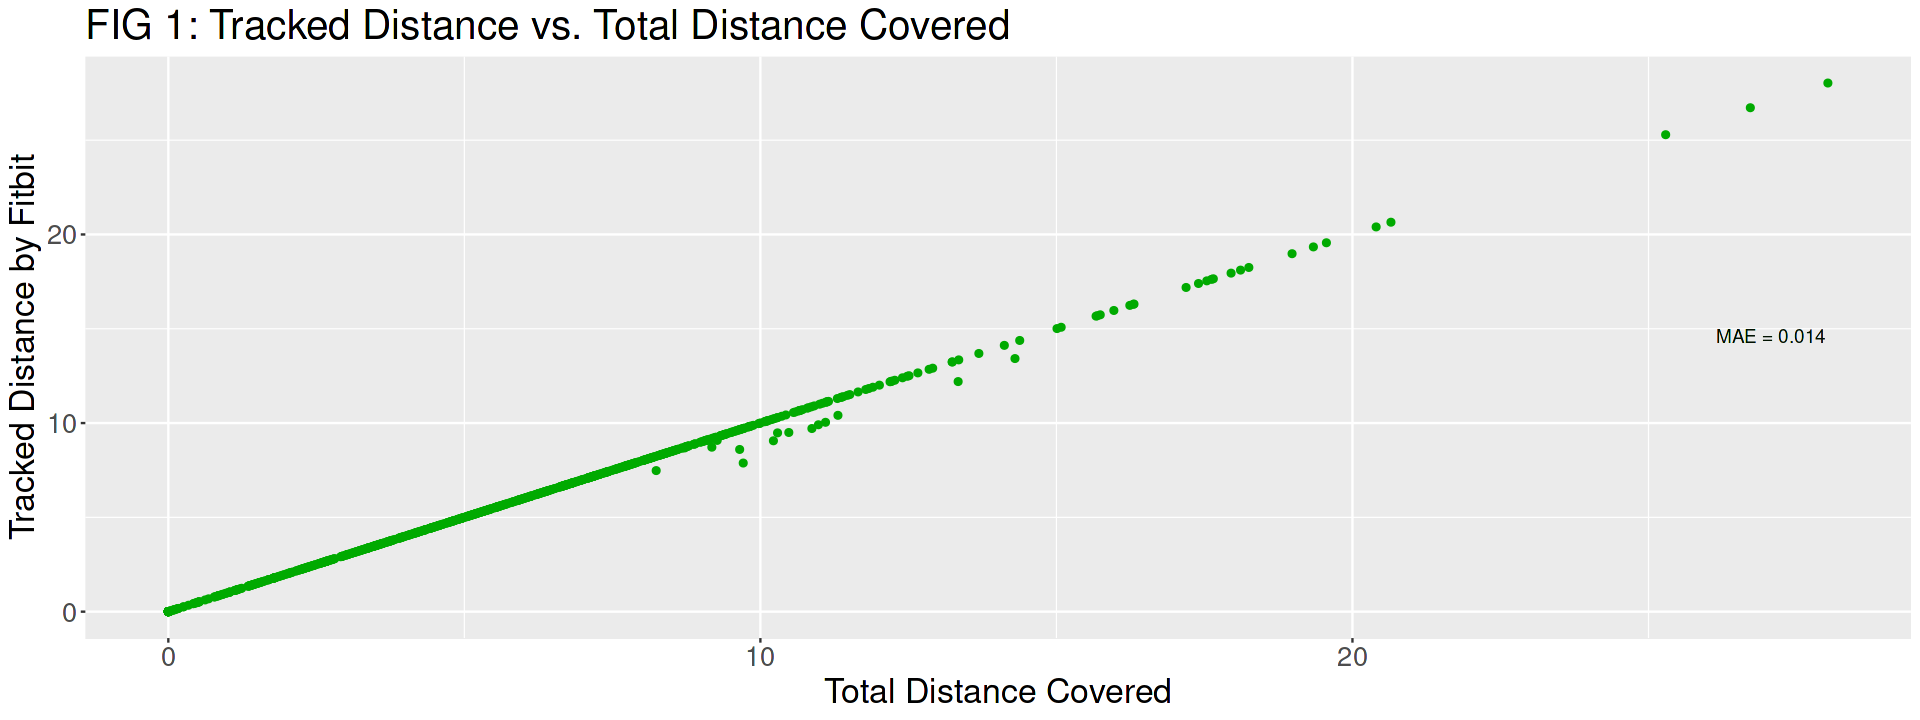

In [17]:
# A graph to show the accuracy of Fitbit device in tracking daily activities like distance covered.
options(repr.plot.width = 16, repr.plot.height =6) 

ggplot(dailyActivity_merged, aes(x = TotalDistance, y = TrackerDistance )) +
  geom_point(color="#00aa00") +
  annotate("text", x = 28, y = 15,
           label = paste("MAE =", round(mae, 3)), hjust = 1, vjust = 1, color = "#001100") +
  theme(text = element_text(size = 20)) +
  labs(title = "FIG 1: Tracked Distance vs. Total Distance Covered", y = "Tracked Distance by Fitbit", x = "Total Distance Covered") 

`geom_smooth()` using formula = 'y ~ x'


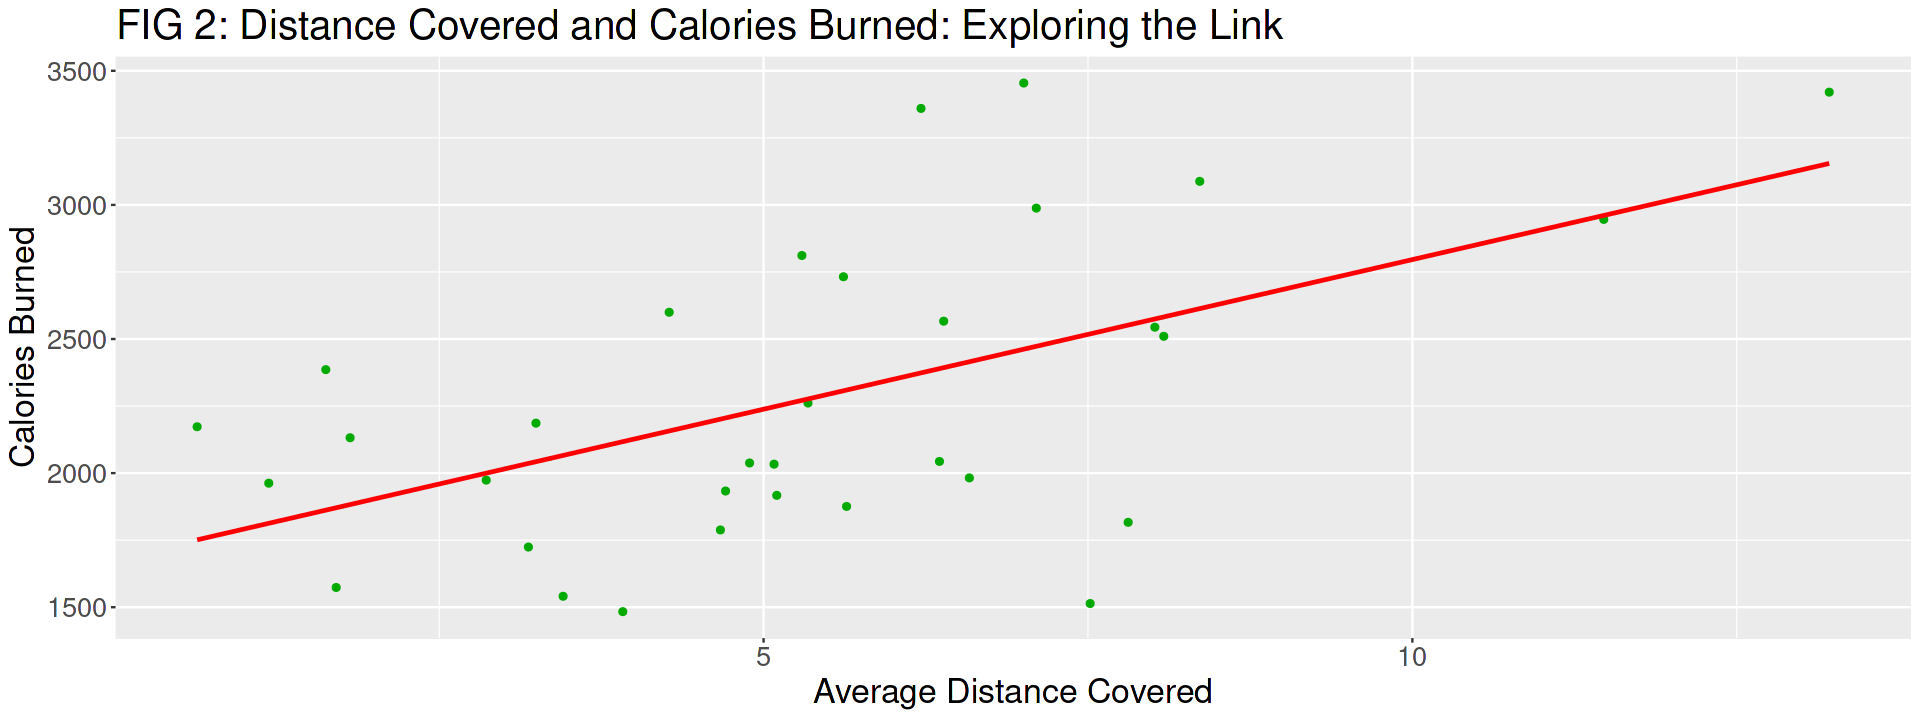

In [18]:
# plot a scatter plot showing the relationship between distance covered and calories burned
options(repr.plot.width = 16, repr.plot.height =6) 
ggplot(summarized_dailyActivities, aes(x = Ave_TotalDistance, y = Ave_Calories )) +
  geom_point(color="#00aa00") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme(text = element_text(size = 20)) +
  labs(title = "FIG 2: Distance Covered and Calories Burned: Exploring the Link", y = "Calories Burned", x = "Average Distance Covered")

### SHARE PHASE

#### SUPPORTING VISUALS

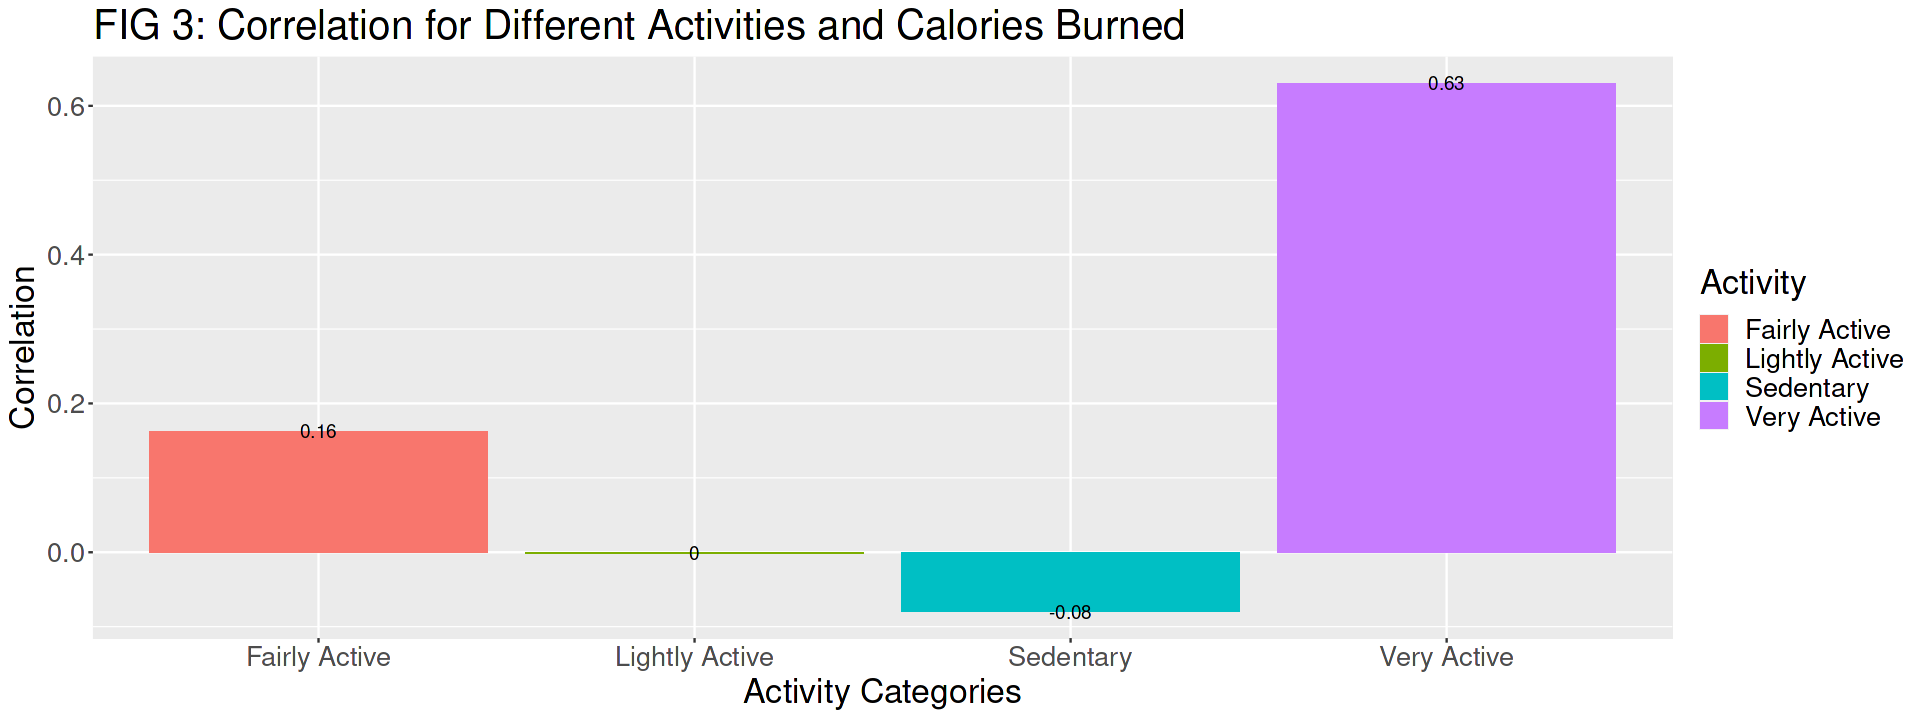

In [19]:
# Create a bar chart with ggplot2
options(repr.plot.width = 16, repr.plot.height =6) 
ggplot(cor_data, aes(x = Activity, y = Correlation_with_burnedCalories, fill = Activity)) +
  geom_bar(stat = "identity") +
  labs(title = "FIG 3: Correlation for Different Activities and Calories Burned", x = "Activity Categories", y = "Correlation") +
  theme(text = element_text(size = 20)) +
  geom_text(aes(label = round(Correlation_with_burnedCalories, 2)))

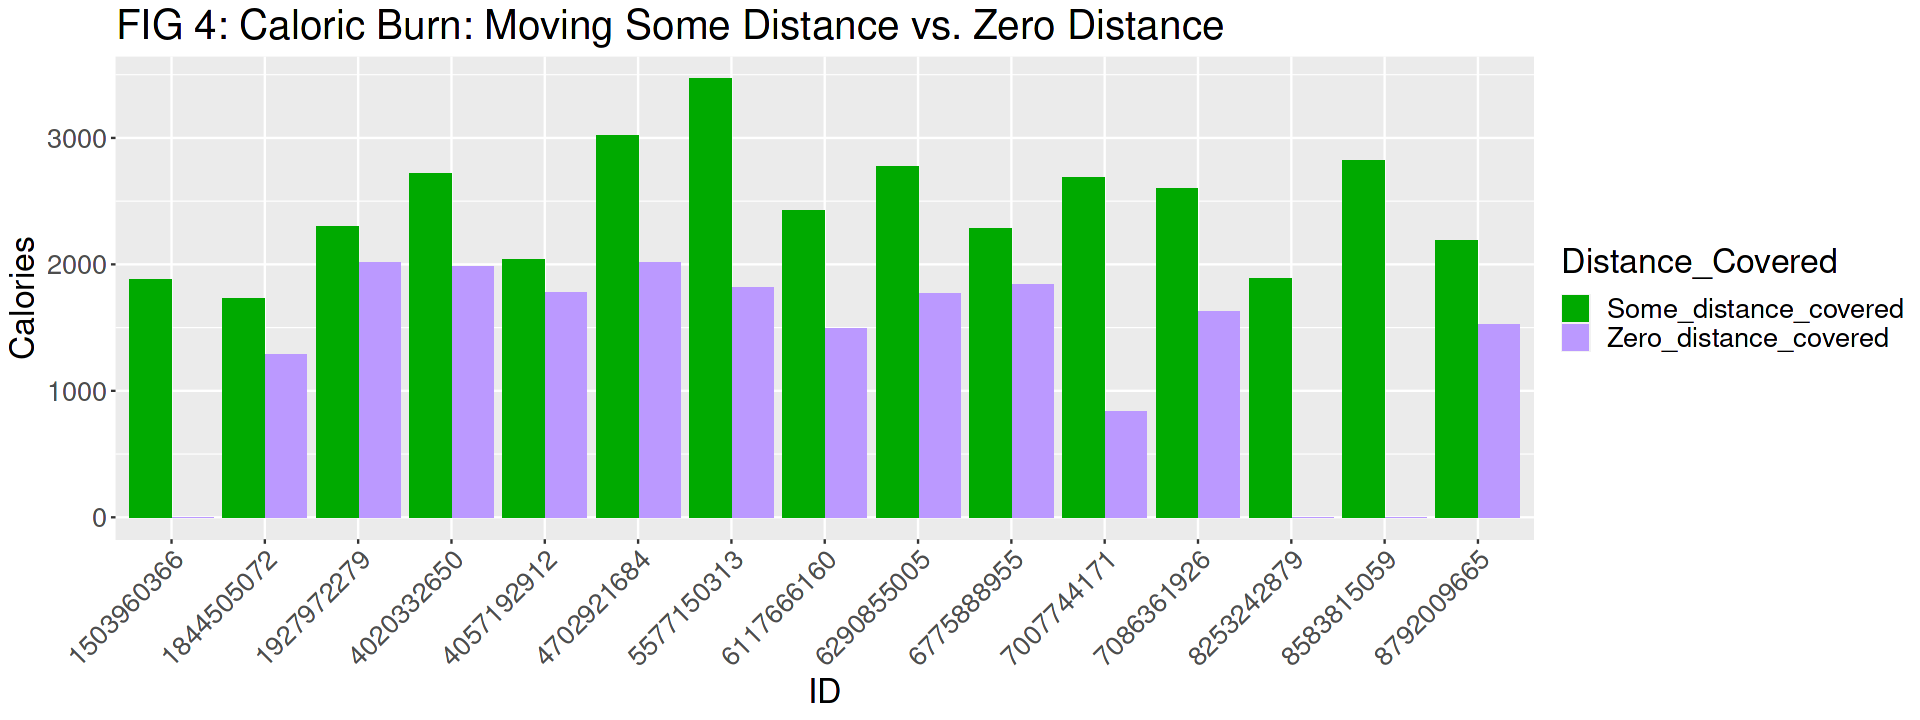

In [20]:
# Show that Significant Calories Burned Without Walking

# Reshape data from wide to long format
distance_zerodistance_long <- tidyr::pivot_longer(distance_zerodistance, -Id, names_to = "Distance_Covered", values_to = "Value")

options(repr.plot.width = 16, repr.plot.height =6) 

ggplot(distance_zerodistance_long, aes(x = Id, y = Value, fill = Distance_Covered)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "FIG 4: Caloric Burn: Moving Some Distance vs. Zero Distance", y = "Calories", x = "ID") +
  theme( axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 20)) +
  scale_fill_manual(values  = c("Zero_distance_covered" = "#bb99ff", "Some_distance_covered" = "#00aa00"))


#### Key findings:
1. As depicted in Fig 1, the mean average error (MAE) of the tracking device is 0.014. An MAE of 0.014 indicates that the tracker's measurements are quite accurate.

2. AS shown in Fig 2, there is a strong positive correlation between being physically active and burning calories. Moving a greater distance resulted in burning more calories.

3. Further analysis into the types of activities and their impact on calories, as shown in Fig 3, reveals a strong positive correlation between being very active and burning calories, compared to fairly and light activities. Sedentary activities showed a negative correlation with burning calories. Therefore, being sedentary did not result in burning more calories.

4. The third key finding suggests that being sedentary does not directly result in burning more calories. However, in Fig 4, further analysis revealed that when participants were sedentary, they still burned calories. This calls for additional investigation because the average calories burned when sedentary were above 50%, compared to when being active, for about 73.33% of participants who had day(s) they covered zero distance.

### ACT PHASE
#### How BellaBeat could influence the marketing strategy for their Leaf Tracker using the key findings of this data analysis project
Based on my findings from the available data, I would provide the following recommendations:
1. The marketing strategy should highlight the performance features, such as the accuracy of the Leaf Tracker, to showcase to potential customers that such health tracking device can capture physical activities with high precision.

2. BellaBeat should focus its advertising for the Leaf Tracker on individuals looking to burn excess calories. The message should emphasize that the more they move, the more calories they burn, and the Leaf Tracker will assist in monitoring the calorie loss process.

3. Targeting individuals actively involved in sports and intense physical activities should be a key aspect of the Leaf Tracker's marketing strategy. Emphasizing the importance of monitoring health data through the Leaf Tracker, especially considering the potential effects of such vigorous activity, such as increased calorie burning.

4. The marketing strategy for the Leaf Tracker should also target those who may engage in minimal physical activities. The message should encourage them that even when not actively moving, they still burn calories, emphasizing the need for the Leaf Tracker to monitor their health data, including calorie levels.

5. BellaBeat should consider incorporating features in the Leaf Tracker to monitor users' behaviors, such as eating habits, since the loss of calories depends not only on physical activity.

### Conclusion
Considering the size of the dataset for this analysis, it is advisable to conduct this analysis on a larger dataset with a greater number of participants to ensure the reliability and consistency of the insights. Additionally, further analysis is essential. For example, participants' behaviors such as eating habits and diet should be taken into account to establish more relationships between non-physical activity and calorie loss.